### Postać rozwiązania

Nasze rozwiązanie będzie miało postać wektorów wierzchołków grafu ułożonych w kolejności odwiedzania przypisanych do poszczególnych dronów:<br>
<center>
$d_{1}=(1,3,5...)$<br>
$d_{2}=(2,7,9...)$<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
$d_{M}=(10,15,4...)$<br>
   </center>
M - ilość wymaganych dronów

### Funkcja celu

\begin{equation*}
F=min (\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} \sum \limits _{j=0} ^{N} c_{ij} x_{vij} + \alpha (M-D))
\end{equation*}

gdzie:
<ul>
    <li>$M$ – liczba dronów
    <li>$N$ – liczba odbiorców
    <li>$c_{ij}$ – koszt(czas) przejazdu od odbiorcy $i$ do odbiorcy $j$
    <li>$x_vij$ – zmienna decyzyjna która określa czy dron $v$ wykonuje trase od $i$ do $j$
    <li>$x_{vij} = \left\{
            \begin{array}{ll}
                1 & \mbox{gdy realizowany jest kurs od i do j przez drona v}\\
                0 & \mbox{w przeciwnym przypadku}
            \end{array}
        \right. 
        $
    <li>$\alpha$ – Współczynnik kary
    <li>$D$ – Liczba dronów w posiadaniu 
</ul>                  

### Ograniczenia
Jeśli $ x_{vij} = 1 \Rightarrow  u_{i} + q_{vj} = u_{j}$</br>

<center>$ q_{vi} \leq u_{i} \leq Q \quad \forall_{i} \in_{1, 2,..., N} $</center>

<!-- \begin{equation*}
\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} y_{iv} \leq Q
\end{equation*}
\begin{equation*}
\sum \limits _{i=0} ^{N} y_{iv} \leq Q \quad }
\end{equation*}
 -->
$ q_{vi} $ – wielkość zapotrzebowania dostarczana do $i$-tego klienta przez $v$-tego drona

$Q $ – ładowność drona


### Struktury danych potrzebnych do algorytmu

> Macierz dystansów od poszczególnych odbiorców

\begin{equation*}
M_{i,j} = 
\begin{pmatrix}
d_{1,1} & d_{1,2} & \cdots & d_{1,n} \\
d_{2,1} & d_{2,2} & \cdots & d_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
d_{i,1} & d_{i,2} & \cdots & d_{i,j} 
\end{pmatrix}
\end{equation*}

gdzie:
<ul>
    <li>$i, j$ - identyfikatory poszczególnych odbiorców</li>
    <li>$d_{i,j}$ - dystans pomiędzy odbiorcami $i, j$</li>
    <li>dystans - odległość euklidesowa $d_{i,j} = \sqrt{(x_{i}-x_{j})^{2}+(y_{i}-y_{j})^{2}}$
</ul>

> Lista położenia poszczególnych odbiorców

<center>$ L_{i} = a_{1}, a_{2},... a_{i} $</center>

gdzie:
<ul>
    <li>$a_{i}$ - koordynaty $i - tego$ odbiorcy $(x_{i}, y_{i})$</li>
</ul>


> Ilość dronów - M

> Ładowność drona - Q

> Ilość odbiorców - N




In [1155]:
import numpy as np
import random
from matplotlib import pyplot as plt
import copy
import itertools

class Client:
    """
    Odbiorca
        id: Identyfikator odbiorcy
        x, y: Koordynaty odbiorcy
    """
    def __init__(self, id, x, y):
        self.id = id
        self.x, self.y = x, y
        
    def __repr__(self):
        return f'Client {self.id} ({self.x}, {self.y})'
    
    def __eq__(self, other):
        return self.id == other.id
    
    def get_distance_from(self, point):
        return np.sqrt((point.x-self.x)**2 + (point.y-self.y)**2)

class Drone:
    """
    Dron
        id: Identyfikator drona
        x, y: Koordynaty drona
        velocity:  Prędkość drona 60km/h = 1km/min
        num_of_packages: Ilość paczek - Q
    """
    def __init__(self, id, capicity):
        self.id = id
        self.capicity = capicity
        self.num_of_packages = capicity
        self.temp_client_id = None
        self.x, self.y = 0, 0
        self.x_client, self.y_client = None, None
        self.x_prev_client, self.y_prev_client = None, None
        
    def __repr__(self):
        return '(Drone {}, Capicity: {})'.format(self.id, self.num_of_packages)
    
    def change_position(self, x, y):
        """
        Zmiana pozycji drona
        """
        self.x, self.y = x, y
    
    def get_distance_from_client(self):
        """
        Odległość euklidesowa
        """
        return np.sqrt((self.x_client-self.x)**2 + (self.y_client-self.y)**2)
    
    def deliver_package(self):
        """
        Dostarczanie paczki
        """
        self.num_of_packages -= 1
        self.x_prev_client = self.x_client
        self.y_prev_client = self.y_client
        if self.num_of_packages == 0:
            self.temp_client_id = None
            self.x_client = 0
            self.y_client = 0
        else:
            self.temp_client_id = None
            self.x_client = None
            self.y_client = None

    def load_packages(self):
        """ 
        Załadowanie drona
        """
        self.num_of_packages = self.capicity
    
    def specify_client(self, client):
        """
        Przypisanie klienta do drona
        """
        if self.temp_client_id == None:
            self.temp_client_id = client.id
            self.x_client = client.x
            self.y_client = client.y
    
    def travel(self):
        """
        Przemieszczanie się drona
        """
        if self.x_client is not None and self.y_client is not None:
            distance = self.get_distance_from_client()
            if (distance <= 1):
                if self.x_client == 0 and self.y_client == 0:
                    self.load_packages()
                self.x = self.x_client
                self.y = self.y_client
                self.deliver_package()
            else:
                w = abs(self.x - self.x_client)
                h = abs(self.y - self.y_client)
                sin_alpha = h/distance
                sin_beta = w/distance
                if (self.x >= self.x_client and self.y >= self.y_client):
                    self.change_position(self.x - sin_beta, self.y - sin_alpha)
                if (self.x <= self.x_client and self.y <= self.y_client):
                    self.change_position(self.x + sin_beta, self.y + sin_alpha)
                if (self.x >= self.x_client and self.y <= self.y_client):
                    self.change_position(self.x - sin_beta, self.y + sin_alpha)
                if (self.x <= self.x_client and self.y >= self.y_client):
                    self.change_position(self.x + sin_beta, self.y - sin_alpha)

class WithVisualisation:
    """
    Visualisation
        drones: Wszyskie dostępne drony. Ilość - M
        clients: Nieodwiedzeni odbiorcy
        x_visited, y_visited: Koordynaty odwiedzonych odbiorców
        total_time: Całkowity czas dostarczania paczek
    """
    ##############
    # Still some work to do..
    ##############
    def __init__(self, obj):
        self.drones = obj.drones
        self.clients = obj.clients
        self.solution = obj._best if obj._best else obj.generate_first_solution()
        self.total_time = 0
        self.threshold = 3000
        
        self.x_clients, self.y_clients = self._initialize_client_positions(obj.clients)
        self.x_visited, self.y_visited = [], []
        self.x_drones, self.y_drones = [], []
        self.path_colors = ['#ffe000', '#00ffb9', '#070208', '#9b00ff']
    
    @staticmethod
    def _initialize_client_positions(clients):
        """
        Inicjalizacja pozycji odbiorców do dronów
        """
        x_clients, y_clients = [], []
        for c in clients:
            x_clients.append(c.x)
            y_clients.append(c.y)
        return x_clients, y_clients
    
    def update_drone_positions(self):
        """
        Aktualizacja pozycji dronów
        """
        for drone in self.drones:
            self.x_drones.append(drone.x)
            self.y_drones.append(drone.y)
    
    def update_visited_clients(self, x, y):
        """
        Aktualizacja odwiedzonych odbiorców
        """
        self.x_visited.append(x)
        self.y_visited.append(y)
    
    def assign_clients(self):
        """
        Przipisanie odbiorców do wszystkich dronów
        """
        for drone in self.drones:
            if self.solution[drone]:
                drone.specify_client(self.solution[drone].pop(0))
    
    def assign_client(self, drone_id):
        """
        Przipisanie odbiorcy do jednego drona o przekazanym ID
        """
        for drone in self.drones:
            if drone.id == drone_id:
                if self.solution[drone]:
                    drone.specify_client(self.solution[drone].pop(0))
    
    def plot_figure(self):
        fig = plt.figure(figsize=(12,12))
    
    def visualize_solution(self):
        k = 1
        for i in range(self.threshold):
            k = 1 if k == 4 else k + 1
            for drone in self.drones:
                if drone.temp_client_id == None:
                    self.assign_client(drone.id)
                    self.update_visited_clients(drone.x_prev_client, drone.y_prev_client)
                drone.travel()
            self.update_drone_positions()
            plt.plot(self.x_clients, self.y_clients, 'go', markersize=12, label="Odbiorca")
            plt.plot(self.x_drones[-len(self.drones):], self.y_drones[-len(self.drones):], 'm{}'.format(k), markersize=20, label="Dron")
            for j in range(len(self.drones)):
                plt.plot(self.x_drones[j::len(self.drones)], self.y_drones[j::len(self.drones)], self.path_colors[j])
            plt.plot(self.x_visited, self.y_visited, 'ro', markersize=12, linewidth=4, label="Dostarczona paczka")
            plt.plot(0, 0, 'bo-', markersize=14)
            plt.grid()
            plt.ylim(-30, 30)
            plt.xlim(-30, 30)
            plt.title(f'Akutalny czas dostarczania paczek w minutach: {i+1}')
            plt.legend()
            plt.draw()
            plt.pause(0.05)
            plt.cla()
        plt.show()
    
    def plot_solution(self):
        for d in self.drones:
            if d in self.solution:
                x_s, y_s = zip(*[(point.x, point.y) for point in self.solution[d]]) 
                plt.plot(x_s, y_s, label=f'{d}')
        plt.plot(self.x_clients, self.y_clients, 'ro', markersize=12, label="Odbiorca")
        plt.plot(0, 0, 'bo', markersize=12, label="Baza")
        plt.grid()
        plt.legend()
        plt.ylim(-30, 30)
        plt.xlim(-30, 30)
        plt.show()

class TabuSearch:
    
    def __init__(self, num_of_drones=3, drone_capacity=4, num_of_clients=12, clients_file=None):
        self.BASE = Client(0, 0, 0)
        self.M = num_of_drones
        self.Q = drone_capacity
        self.N = num_of_clients
        
        self.drones, self.D = self._create_drones(num_of_clients, drone_capacity)
        self.clients = self._initialize_clients(clients_file, num_of_clients)
        self.distance_matrix = self._create_distance_matrix()
        
        self.max_cost = 50*np.sqrt(2)*(num_of_clients + num_of_clients//drone_capacity)
        self.n_iters = 5000
        self.tabu_list = []
        self.best_solution = None
        self.best_candidate = None
        self.best_cost = 0
        self._best = {}
        self.costs = []
        
    def __repr__(self):
        return f'Tabu search for:\n\nClients: {self.clients}\n\nDrones: {self.drones}\n\nSolution: {self.solution}'
    
    @staticmethod
    def _create_drones(num_of_clients, drone_capacity):
        drones_needed = num_of_clients//drone_capacity
        if num_of_clients % drone_capacity == 0:
            drones = [Drone(i+1, drone_capacity) for i in range(drones_needed)]
        else:
            drones_needed += 1
            drones = [Drone(i+1, drone_capacity) for i in range(drones_needed)]
        return drones, drones_needed
    
    @staticmethod
    def _read_clients_from_file(file_name, num_of_clients):
        test_clients = np.loadtxt(file_name, delimiter=',', dtype=int)
        if len(test_clients) > num_of_clients:
            clients = [Client(*test_clients[i]) for i in range(num_of_clients)]
        else:
            clients = [Client(*c) for c in test_clients]
        return clients
    
    @staticmethod
    def _create_new_client_samples(file_name, num_of_clients):
        clients = []
        busy = {}
        with open(file_name, 'w') as file:
            for i in range(num_of_clients):
                x_pos, y_pos = 0, 0
                while y_pos == 0 and x_pos == 0 and (x_pos, y_pos) not in busy:
                    x_pos = random.randint(-25,25)
                    y_pos = random.randint(-25,25)
                busy[(x_pos, y_pos)] = True
                file.write(f'{i+1},{x_pos},{y_pos}\n')
                clients.append(Client(i+1, x_pos, y_pos))
        return clients
    
    def _initialize_clients(self, file_name, num_of_clients):
        if file_name:
            try:
                clients = self._read_clients_from_file(file_name, num_of_clients)
            except OSError:
                return self._create_new_client_samples(file_name, num_of_clients)
            if len(clients) < self.N:
                raise Exception('Not enough samples in the file:\
                                change num_of_clients param passed to constructor.')
            return clients
        return self._create_new_client_samples("test_clients.txt", num_of_clients)
    
    def _create_distance_matrix(self):
        distance_matrix = np.zeros((self.N + 1, self.N + 1))
        for i in range(self.N + 1):
            for j in range(i, self.N + 1):
                if i != j:
                    if i == 0:
                        distance_matrix[i][j] = distance_matrix[j][i]\
                        = self.clients[j-1].get_distance_from(self.BASE)
                    else:
                        distance_matrix[i][j] = distance_matrix[j][i]\
                        = self.clients[i-1].get_distance_from(self.clients[j-1])
        return distance_matrix
    
    def find_next_drone_to_come_back(self, paths):
        """
        To jest narazie nie używane
        """
        lowest = 100*(2+self.Q-1)
        idx = 0
        for i, d in enumerate(self.drones):
            if d not in paths:
                break
            s = sum(self.distance_matrix[paths[d][i].id][paths[d][i+1].id] \
                    for i in range(len(paths[d])-1))
            if s <= lowest:
                idx = i
                lowest = s
        return idx
    
    def generate_random_solution(self):
        """
        Generuje randomowo rozwiązanie w postaci
        [[Baza, Client1, Client3..., Baza], [Baza, Client4, Client2..., Baza]...]
        Każda ze ścieżek jest inna a scieżek jest tyle ile potrzeba dronów 
        do dostarczenia paczek
        """
        paths = [[self.BASE] for _ in range(self.D)]
        samps = random.sample(self.clients, k = len(self.clients))
        for p in paths:
            if len(samps) > self.Q:
                p.extend([samps.pop() for _ in range(self.Q)])
            else:
                p.extend([samps.pop() for _ in range(len(samps))])
            p.append(self.BASE)
        return paths
        
    
    def _fitness(self, solution):
        """
        Funkcja kosztu dla danego rozwiązania
        Suma kosztu każdej ścieżki w rozwiązaniu
        """
        total_cost = 0
        for path in solution:
            total_cost += sum(self.distance_matrix[path[i].id][path[i+1].id] \
                              for i in range(len(path)-1))
        return total_cost
    
    def route_fitness(self, route):
        """
        To nie używane
        """
        return sum(self.distance_matrix[route[i].id][route[i+1].id] for i in range(len(route)-1))
        
    def sort_route(self, route):
        r = route
        best_fitness = self.route_fitness(route)
        for perm in list(itertools.permutations(r[1:-1])):
            perm = list(perm)
            perm.insert(0, route[0])
            perm.append(route[-1])
            temp_fitness = self.route_fitness(perm)
            if best_fitness > temp_fitness:
                best_fitness = temp_fitness
                r = perm
        return r
    
    def sort_solution(self, solution):
        return [self.sort_route(r) for r in solution]
    
    def find_closest_client(self, client):
        """
        To narazie nie używane
        """
        min_ = 100
        c_ID = 0
        for c in self.clients:
            if c != self.BASE and c != client:
                dist_ = self.distance_matrix[client.id][c.id]
                if dist_ < min_:
                    c_ID = c.id
                    client = c
                    min_ = dist_
        return client

        
    def find_neighborhood(self):
        """
        Generuje podaną ilość zmian pomiędzy ścieżkami  (jak dobrać ilość zmian ?)
        pierwsza scieżka zamienia randomowo sie z drugą jednym klientem druga z trzecia itd.
        ostatnia zamienia się z pierwszą na początku
        Każde nowe rozwiązanie jest zapisywane osobno i zwracane
        """
        num_of_swaps = 1
        sol = [s for s in self.best_candidate]
        nb = []
        for j in range(num_of_swaps):
            for i in range(len(sol)):
                s_copy = copy.deepcopy(sol)
                f_samp = s_samp = 0
                while f_samp == s_samp:
                    f_samp = np.random.randint(1,len(sol[i-1])-1)
                    s_samp = np.random.randint(1,len(sol[i])-1)
                s_copy[i-1][f_samp], s_copy[i][s_samp] = s_copy[i][s_samp], s_copy[i-1][f_samp]
                nb.append(s_copy)
        return nb
    
        
    def find_neighborhood2(self):
        sol = [s for s in self.best_candidate]
        nb = []
        for i in range(len(sol)):
            for j in range(i+1, len(sol)):
                s_copy = copy.deepcopy(sol)
                f_samp = np.random.randint(1,len(sol[i])-1)
                s_samp = np.random.randint(1,len(sol[j])-1)
                s_copy[i][f_samp], s_copy[j][s_samp] = s_copy[j][s_samp], s_copy[i][f_samp]
                nb.append(s_copy)
        return nb
    
    
    def process_solution(self):
        for i, p in enumerate(self.best_solution):
            self._best[self.drones[i]] = p
            
            
    def search(self):
        """
        Główna pętla
        1. Tworzymy randomowe rozwiązanie i zapisujemy w zmiennych
        2. Iterujemy po zwróconych sąsiadach i szukamy najlepszego kandydata
        3. Jeżeli funkcja kosztu tego kandydata jest mniejsza od najlepszego znalezionego
           to zapisujemy go
        4. Dodajemy kandydata do listy tabu
        5. Jeśli lista jest wieksza niż maksymalny rozmiar to odrzuć to dodane najwcześniej (jak dobrać?)2
        """
        if not self.best_solution:
            sol = self.generate_random_solution()
            self.best_candidate = sol
            self.best_solution = sol
            self.tabu_list.append(sol)
            self.best_cost = self._fitness(sol)
            self.costs.append(self.best_cost)
            
        while self.n_iters > 1:
            nh = self.find_neighborhood()
            
            self.best_candidate = nh[0]
            for nb in nh[1:]:
                if self._fitness(nb) < self._fitness(self.best_candidate):
                    self.best_candidate = nb
                    
            self.costs.append(self._fitness(self.best_candidate))
            if self._fitness(self.best_candidate) < self._fitness(self.best_solution):
                if self.best_candidate not in self.tabu_list:
                    self.best_solution = self.best_candidate
                else:
                    print('Tabu works')
            
            self.tabu_list.append(self.best_candidate)
            if len(self.tabu_list) > 100:
                self.tabu_list.pop(0)
            
            self.n_iters -= 1
    
        self.process_solution()
            

In [1156]:
ts3 = TabuSearch(8, 6, 24, "b2.txt")
ts3.search()
ts3._fitness(ts3.best_solution)

381.6868024725809

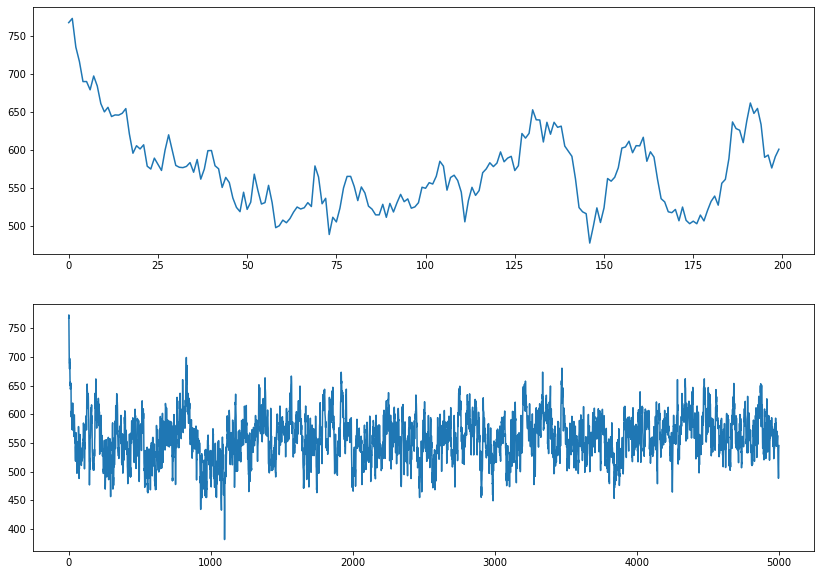

In [1157]:
# Need for figure outside jupyter
# %matplotlib qt
# %matplotlib inline
# %matplotlib notebook
plt.figure(figsize=(14,10))
plt.subplot(211)
plt.plot(ts3.costs[0:200])
plt.subplot(212)
plt.plot(ts3.costs)  

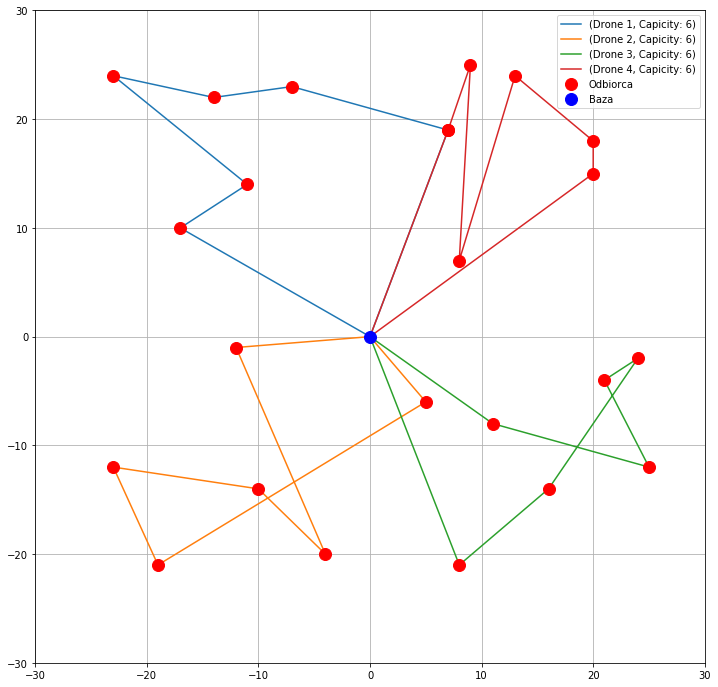

In [1158]:
vis3 = WithVisualisation(ts3)
vis3.plot_figure()
vis3.plot_solution()

In [1159]:
ts3.best_solution = ts3.sort_solution(ts3.best_solution)
ts3.process_solution()
ts3._fitness(ts3.best_solution)

321.4509705943945

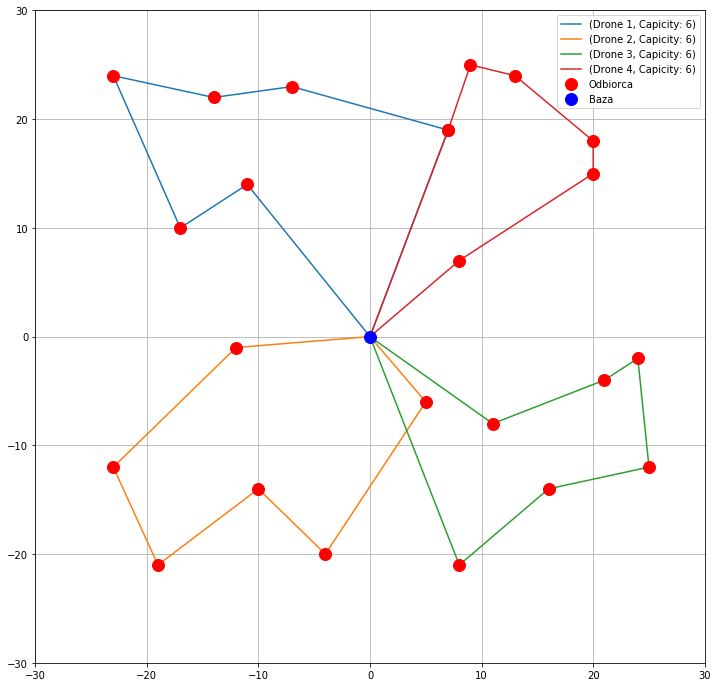

In [1160]:
# After sorting
vis3 = WithVisualisation(ts3)
vis3.plot_figure()
vis3.plot_solution()

In [1137]:
np.set_printoptions(threshold=np.inf)
# ts3.distance_matrix

In [1138]:
best =\
{0: [0, 17, 20, 9, 14, 7, 11], 1: [0, 13, 24, 19, 18, 22, 21], 2: [0, 1, 5, 6, 12, 2, 3], 3: [0, 15, 16, 4, 10, 8, 23]}
best_path = {}
for d in ts3.drones:
    best_path[d] = [ts3.clients[v-1] for v in best[d.id-1] if v != 0]
    best_path[d].insert(0, Client(0,0,0))
    best_path[d].append(Client(0,0,0))

ts3._best = best_path

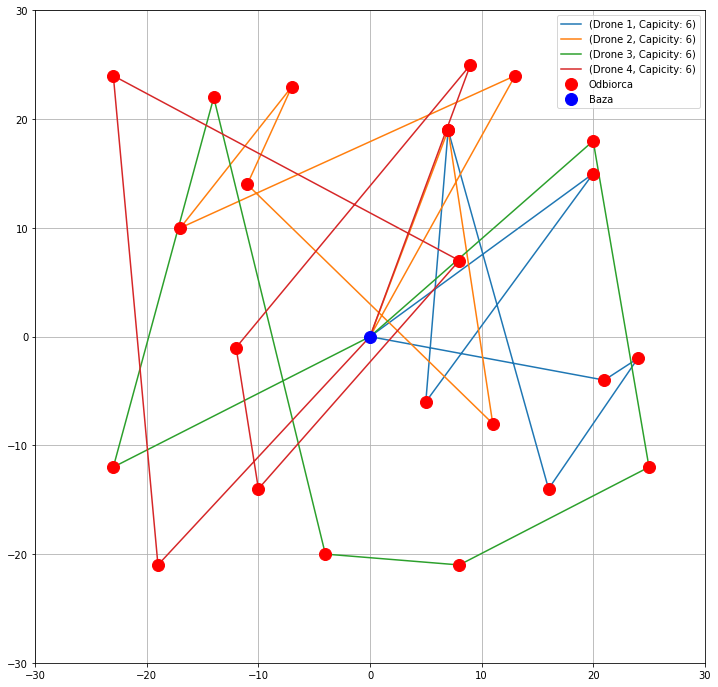

In [1139]:
vis3 = WithVisualisation(ts3)
vis3.plot_figure()
vis3.plot_solution()